In [1]:
import pandas as pd
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

# Setting Our Data

In [2]:
df = pd.read_csv('guncel-eth-usd.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [3]:
df.drop(df.columns[[1,2,3,5,6]],axis=1,inplace=True)

In [4]:
df

,Date,Close
0,2015-08-07,2.772120
1,2015-08-08,0.753325
2,2015-08-09,0.701897
3,2015-08-10,0.708448
4,2015-08-11,1.067860
...,...,...
2112,2021-05-19,2460.679199
2113,2021-05-20,2784.294189
2114,2021-05-21,2430.621338
2115,2021-05-22,2295.705566


In [5]:
df.columns=["ds","y"]
df

,ds,y
0,2015-08-07,2.772120
1,2015-08-08,0.753325
2,2015-08-09,0.701897
3,2015-08-10,0.708448
4,2015-08-11,1.067860
...,...,...
2112,2021-05-19,2460.679199
2113,2021-05-20,2784.294189
2114,2021-05-21,2430.621338
2115,2021-05-22,2295.705566


In [6]:
m = Prophet()

In [7]:
m.fit(df)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2477,2022-05-19,4263.415720,3306.672652,5098.123950
2478,2022-05-20,4252.727163,3306.398068,5127.261866
2479,2022-05-21,4241.326603,3256.786211,5099.739489
2480,2022-05-22,4227.719381,3257.856985,5111.996129
2481,2022-05-23,4217.867688,3271.597105,5059.411313


# Showing Result

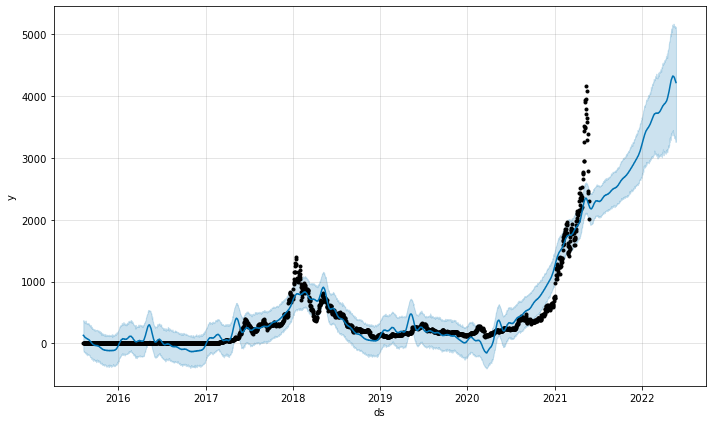

In [10]:
fig1 = m.plot(forecast)

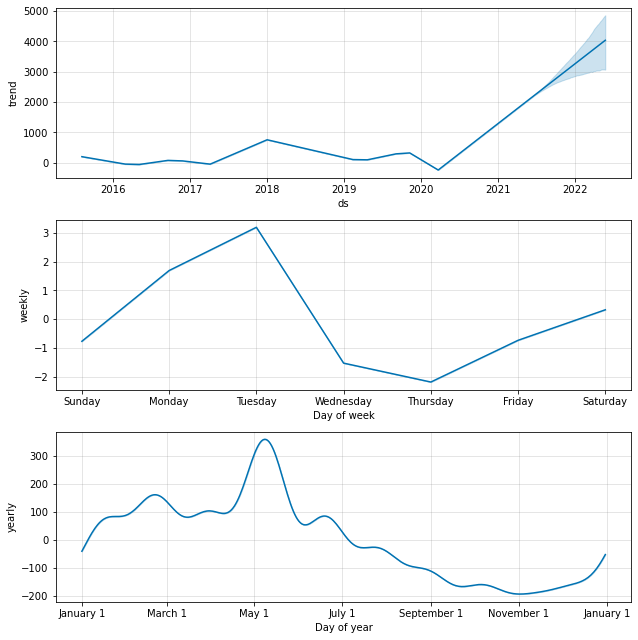

In [11]:
fig2 = m.plot_components(forecast)